# 📌 Extracción


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)
    data = response.json()
    df = pd.DataFrame(data)
    print("Datos cargados exitosamente en un DataFrame de pandas:")
    display(df.head())
except requests.exceptions.RequestException as e:
    print(f"Error al cargar los datos desde la URL: {e}")
except ValueError as e:
    print(f"Error al decodificar el JSON: {e}")

Datos cargados exitosamente en un DataFrame de pandas:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [1]:
# Explorar las columnas y sus tipos de datos
print("Información del DataFrame:")
df.info()

print("\nTipos de datos de las columnas:")
print(df.dtypes)

# Identificar columnas relevantes para el análisis de evasión
print("\nColumnas del DataFrame:")
print(df.columns)

print("\nPara identificar las columnas más relevantes para el análisis de evasión (Churn), considera lo siguiente:")
print("1. Revisa los nombres de las columnas y piensa qué información podrían contener (por ejemplo, 'customerID', 'Churn', 'customer', 'phone', 'internet', 'account').")
print("2. Las columnas que contienen información sobre el comportamiento del cliente, los servicios que tienen contratados y sus datos demográficos suelen ser importantes para predecir la evasión.")
print("3. Aunque no tenemos un diccionario de datos formal, los nombres de las columnas como 'Churn' (que es la variable objetivo), 'customer', 'phone', 'internet' y 'account' parecen ser los más relevantes inicialmente.")
print("4. Deberás explorar el contenido de las columnas 'customer', 'phone', 'internet' y 'account' ya que contienen diccionarios anidados que probablemente contengan información detallada relevante.")

# 🔧 Transformación

In [12]:
customer = pd.json_normalize(df['customer'])
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [16]:
columnas = list(df.columns)
columnas


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [18]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenate the dataframes
df_normalized = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

display(df_normalized.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [19]:
columnas = list(df_normalized.columns)
columnas


['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [21]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [22]:
df_normalized['SeniorCitizen'] = df_normalized['SeniorCitizen'].astype(int)
df_normalized['tenure'] = df_normalized['tenure'].astype(int)
df_normalized['Charges.Monthly'] = df_normalized['Charges.Monthly'].astype(float)

# Handle potential errors in converting 'Charges.Total' to float
df_normalized['Charges.Total'] = pd.to_numeric(df_normalized['Charges.Total'], errors='coerce')

In [25]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [24]:
print("Missing values per column:")
display(df_normalized.isnull().sum())

Missing values per column:


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [39]:
df_normalized['Cuentas_Diarias'] = (df_normalized['Charges.Monthly'] / 30).round(2)
display(df_normalized.head(1))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19


In [36]:
unique_internetservice = pd.unique(df_normalized['InternetService'])

In [37]:
unique_contract= pd.unique(df_normalized['Contract'])

In [38]:
unique_Peymethod =  pd.unique(df_normalized['PaymentMethod'])

In [44]:
# Identify binary columns
binary_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

# Convert binary columns to 0s and 1s
for col in binary_cols:
    df_normalized[col] = df_normalized[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# Convert binary columns to boolean
for col in binary_cols:
    df_normalized[col] = df_normalized[col].astype(bool)

display(df_normalized.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.80


In [45]:
df_normalized.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


# 📊 Carga y análisis


In [46]:
display(df_normalized.describe())

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,2.157292
std,0.369074,24.571773,30.129572,2268.632997,1.004407
min,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.425000,400.225000,1.180000
50%,0.000000,29.000000,70.300000,1391.000000,2.340000
75%,0.000000,55.000000,89.875000,3785.300000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


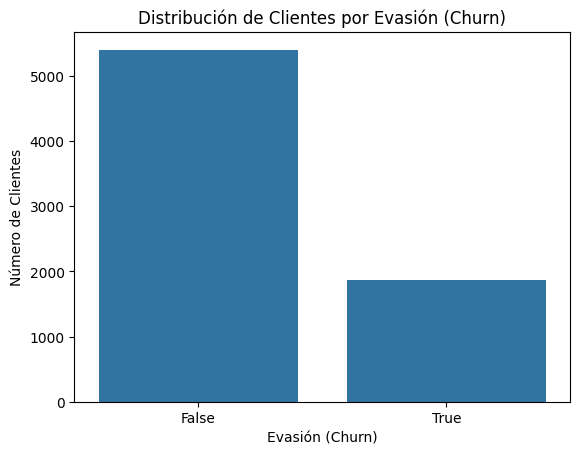

In [47]:
sns.countplot(x='Churn', data=df_normalized)
plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Número de Clientes')
plt.show()

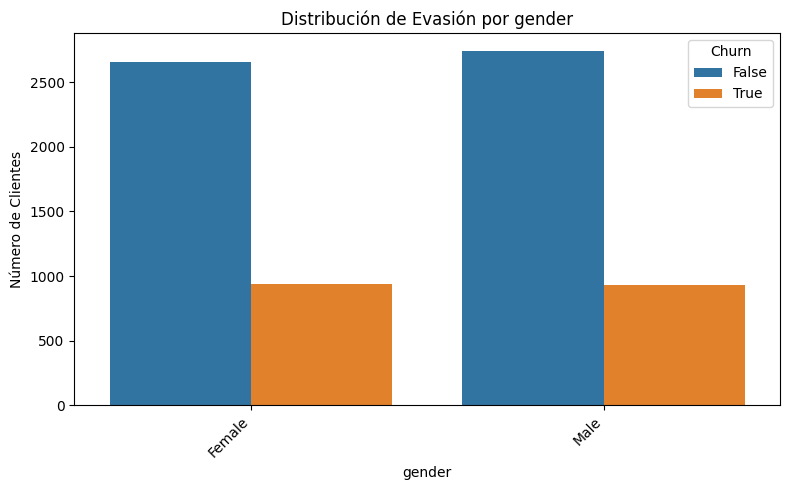

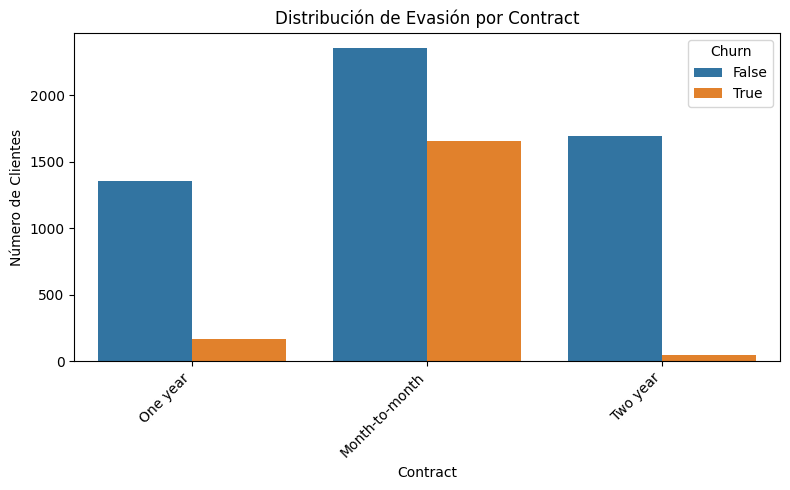

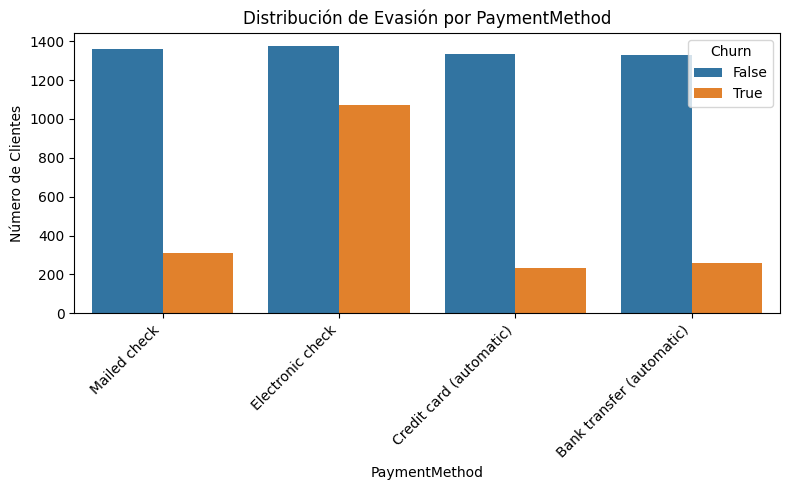

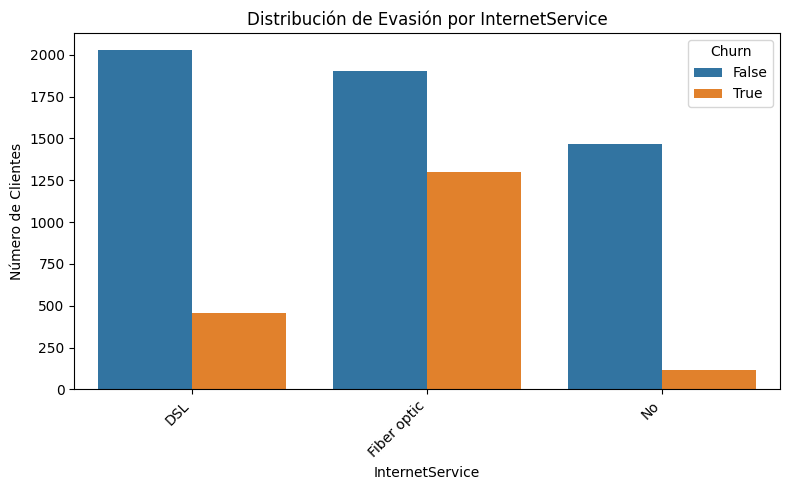

In [48]:
categorical_cols = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df_normalized)
    plt.title(f'Distribución de Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

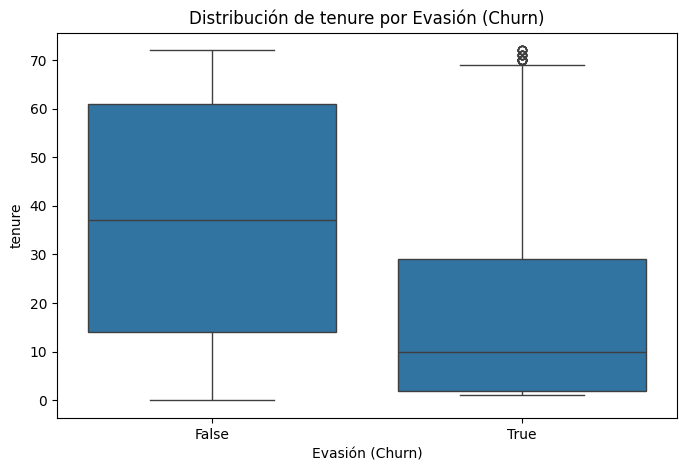

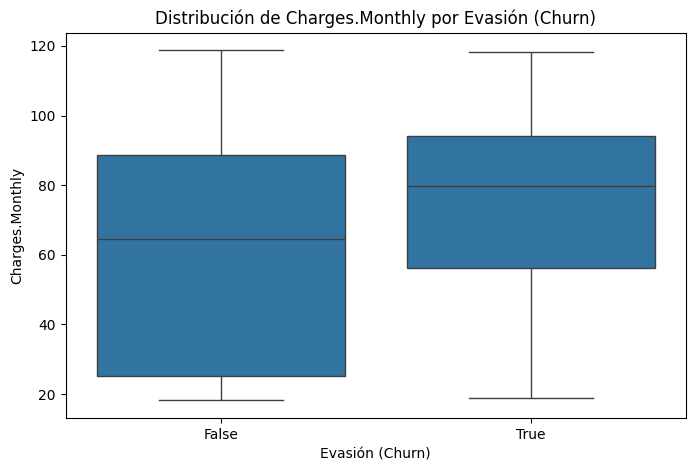

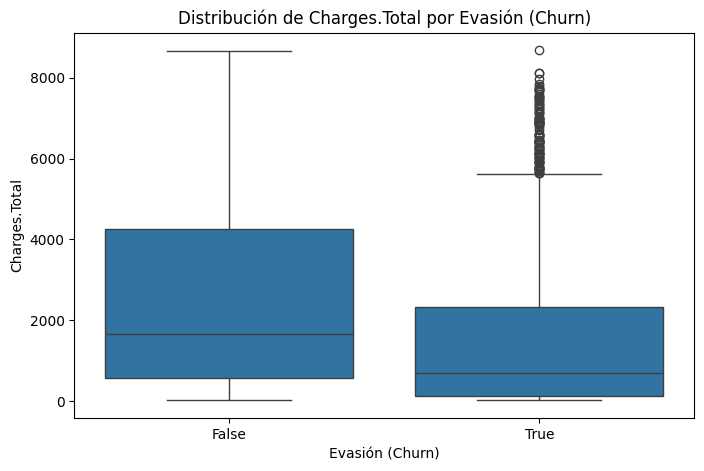

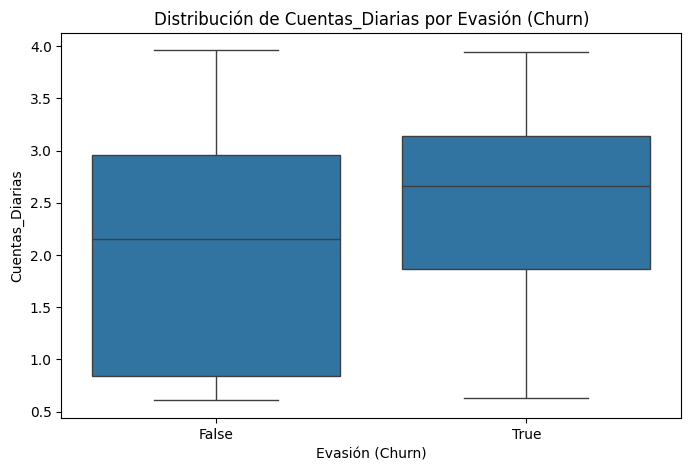

In [49]:
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df_normalized)
    plt.title(f'Distribución de {col} por Evasión (Churn)')
    plt.xlabel('Evasión (Churn)')
    plt.ylabel(col)
    plt.show()

# 📄Informe final


## Informe Final

### Introducción
En este informe, analizamos el problema de la evasión de clientes (Churn) para identificar los factores que influyen en la decisión de un cliente de cancelar un servicio. El objetivo es comprender mejor el comportamiento de los clientes para desarrollar estrategias que permitan reducir la tasa de evasión.

### Limpieza y Tratamiento de Datos
Se inició el análisis cargando los datos desde la URL proporcionada. Los datos se normalizaron a partir de las columnas anidadas ('customer', 'phone', 'internet', 'account') utilizando `pd.json_normalize` y se consolidaron en un único DataFrame (`df_normalized`). Se realizaron conversiones de tipos de datos para las columnas numéricas ('SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total') y se manejaron los valores faltantes en 'Charges.Total' imputándolos con la media. Se creó la nueva columna 'Cuentas_Diarias' para representar la facturación diaria. Las columnas binarias se convirtieron a tipo booleano.

### Análisis Exploratorio de Datos
Se realizó un análisis descriptivo para comprender la distribución de las variables numéricas. Se visualizaron las distribuciones de la variable objetivo (Churn) y su relación con variables categóricas clave como 'gender', 'Contract', 'PaymentMethod', y 'InternetService' utilizando gráficos de barras. Además, se exploró la relación entre las variables numéricas ('tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias') y Churn mediante box plots para identificar posibles diferencias en los patrones de gasto y permanencia entre clientes que evaden y los que no.


### Conclusiones
Con base en el análisis realizado, presentamos algunas conclusiones y perspectivas iniciales sobre la pérdida de clientes:

Tipo de contrato: Los clientes con contratos mensuales parecen tener una tasa de pérdida significativamente mayor en comparación con aquellos con contratos de uno o dos años. Esto sugiere que los compromisos a largo plazo se asocian con una menor pérdida de clientes.
Método de pago: Los clientes que utilizan cheques electrónicos parecen tener una mayor propensión a la pérdida de clientes en comparación con quienes utilizan cheques por correo, transferencias bancarias o tarjetas de crédito.
Servicio de internet: Los clientes con servicio de internet de fibra óptica parecen tener una tasa de pérdida de clientes mayor que aquellos con DSL o sin servicio de internet.
Antigüedad: Los clientes que pierden clientes tienden a tener una menor permanencia en la empresa (han estado con la empresa durante menos tiempo) que aquellos que no lo hacen.
Cargos: Los clientes que pierden clientes tienden a tener cargos mensuales más altos, pero cargos totales más bajos, lo que se alinea con su menor permanencia.
